# Annotating workflows

Annotating workflows with pyiron as example. Note that `pyiron_atomistics` needs to be installed for this notebook.

In [1]:
%config IPCompleter.evaluation='unsafe'

In [2]:
from pyiron_atomistics import Project
from atomrdf import KnowledgeGraph
import numpy as np

Set up a project and a Knowledge Graph

In [3]:
project = 't1'
pr = Project(project)

kg = KnowledgeGraph(store='db', store_file=f'{project}.db')
kg.enable_workflow(pr, workflow_environment='pyiron')

#clears the full KG, use with caution!
kg.purge(force=True)

Create a structure

In [4]:
structure = pr.create.structure.annotated_structure.bulk('Cu', cubic=True)

In [5]:
structure.plot3d()

NGLWidget()

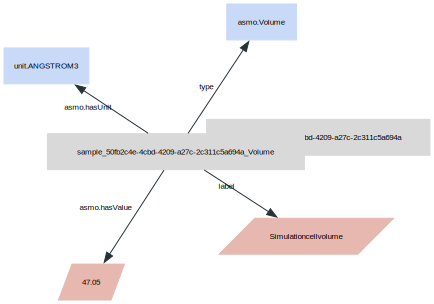

In [6]:
kg.visualise(workflow_view=True)

Create a NPT lammps simulation and run it

In [7]:
job = pr.create.job.Lammps('j1', delete_existing_job=True, delete_aborted_job=True)
job.structure = structure
job.potential = '2001--Mishin-Y--Cu-1--LAMMPS--ipr1'
job.calc_md(pressure=0, temperature=500)
job.run()

The job j1 was saved and received the ID: 1217


Add the finished job to the knowledge graph

In [8]:
kg.add_workflow(job, workflow_environment='pyiron')

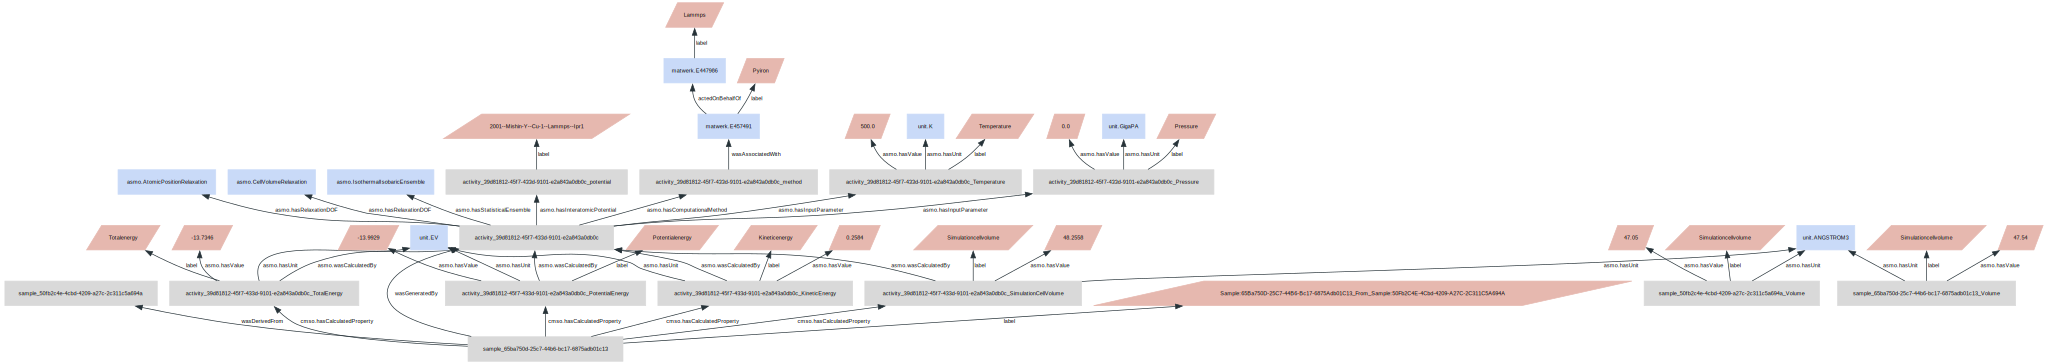

In [9]:
kg.visualise(workflow_view=True, hide_types=True, size=(40,20), layout='dot')